<a href="https://colab.research.google.com/github/NikethML/churndata/blob/main/churnLogreg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
#Package imports needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
import seaborn as sns
from scipy import stats
import scipy


In [7]:
url='https://raw.githubusercontent.com/NikethML/churndata/main/ChurnData%20(7).csv'
df= pd.read_csv(url)



In [8]:
df.head()


,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [9]:
df.dtypes

tenure      float64
age         float64
address     float64
income      float64
ed          float64
employ      float64
equip       float64
callcard    float64
wireless    float64
longmon     float64
tollmon     float64
equipmon    float64
cardmon     float64
wiremon     float64
longten     float64
tollten     float64
cardten     float64
voice       float64
pager       float64
internet    float64
callwait    float64
confer      float64
ebill       float64
loglong     float64
logtoll     float64
lninc       float64
custcat     float64
churn       float64
dtype: object

In [10]:
col_names=df.columns.tolist()

In [11]:
for i in col_names:
  print(df[i].value_counts)

<bound method IndexOpsMixin.value_counts of 0      11.0
1      33.0
2      23.0
3      38.0
4       7.0
       ... 
195    55.0
196    34.0
197     6.0
198    24.0
199    61.0
Name: tenure, Length: 200, dtype: float64>
<bound method IndexOpsMixin.value_counts of 0      33.0
1      33.0
2      30.0
3      35.0
4      35.0
       ... 
195    44.0
196    23.0
197    32.0
198    30.0
199    50.0
Name: age, Length: 200, dtype: float64>
<bound method IndexOpsMixin.value_counts of 0       7.0
1      12.0
2       9.0
3       5.0
4      14.0
       ... 
195    24.0
196     3.0
197    10.0
198     0.0
199    16.0
Name: address, Length: 200, dtype: float64>
<bound method IndexOpsMixin.value_counts of 0      136.0
1       33.0
2       30.0
3       76.0
4       80.0
       ...  
195     83.0
196     24.0
197     47.0
198     25.0
199    190.0
Name: income, Length: 200, dtype: float64>
<bound method IndexOpsMixin.value_counts of 0      5.0
1      2.0
2      1.0
3      2.0
4      2.0
      ... 
195  

In [12]:
# no categorical data present

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tenure    200 non-null    float64
 1   age       200 non-null    float64
 2   address   200 non-null    float64
 3   income    200 non-null    float64
 4   ed        200 non-null    float64
 5   employ    200 non-null    float64
 6   equip     200 non-null    float64
 7   callcard  200 non-null    float64
 8   wireless  200 non-null    float64
 9   longmon   200 non-null    float64
 10  tollmon   200 non-null    float64
 11  equipmon  200 non-null    float64
 12  cardmon   200 non-null    float64
 13  wiremon   200 non-null    float64
 14  longten   200 non-null    float64
 15  tollten   200 non-null    float64
 16  cardten   200 non-null    float64
 17  voice     200 non-null    float64
 18  pager     200 non-null    float64
 19  internet  200 non-null    float64
 20  callwait  200 non-null    float6

In [14]:
df.skew()

tenure      0.147202
age         0.479416
address     0.994077
income      9.963441
ed          0.001747
employ      0.970133
equip       0.305731
callcard   -0.905847
wireless    0.932604
longmon     2.157840
tollmon     0.935229
equipmon    0.675317
cardmon     1.957281
wiremon     1.783587
longten     2.236321
tollten     2.157179
cardten     3.137279
voice       0.905847
pager       1.015438
internet    0.243578
callwait    0.182102
confer      0.161730
ebill       0.243578
loglong     0.188933
logtoll    -0.494316
lninc       0.735056
custcat     0.077257
churn       0.932604
dtype: float64

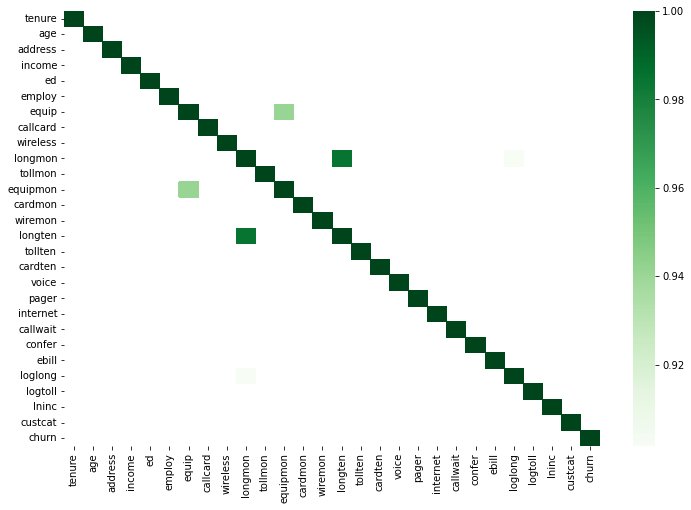

In [18]:
corr = df.corr()

kot = corr[corr>=.90]
plt.figure(figsize=(12,8))
sns.heatmap(kot, cmap="Greens")

In [19]:
#longten and tollmon are correlated

In [20]:
df.columns

Index(['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',
       'callcard', 'wireless', 'longmon', 'tollmon', 'equipmon', 'cardmon',
       'wiremon', 'longten', 'tollten', 'cardten', 'voice', 'pager',
       'internet', 'callwait', 'confer', 'ebill', 'loglong', 'logtoll',
       'lninc', 'custcat', 'churn'],
      dtype='object')

In [23]:
df.drop(columns=['longten','tollten'],inplace=True)

In [24]:
df.columns

Index(['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',
       'callcard', 'wireless', 'longmon', 'tollmon', 'equipmon', 'cardmon',
       'wiremon', 'cardten', 'voice', 'pager', 'internet', 'callwait',
       'confer', 'ebill', 'loglong', 'logtoll', 'lninc', 'custcat', 'churn'],
      dtype='object')

In [27]:
#split dataset in features and target variable 


X = df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',
       'callcard', 'wireless', 'longmon', 'tollmon', 'equipmon', 'cardmon',
       'wiremon', 'cardten', 'voice', 'pager', 'internet', 'callwait',
       'confer', 'ebill', 'loglong', 'logtoll', 'lninc', 'custcat']]    # Features 

y = df['churn'] # Target variable 

In [28]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0) 


In [51]:
# instantiate the model 

logreg =  LogisticRegression(solver='liblinear') 



# fit the model with data 

logreg.fit(X_train,y_train)
# fit the model with data 

logreg.fit(X_train,y_train) 



# predicting 

y_pred=logreg.predict(X_test) 

y_pred 


array([0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [52]:
from sklearn.metrics import confusion_matrix


cnf_matrix = confusion_matrix(y_test, y_pred) 


In [53]:
from sklearn.metrics import *

print("Accuracy:",accuracy_score(y_test, y_pred)) 

print("Precision:",precision_score(y_test, y_pred)) 

print("Recall:",recall_score(y_test, y_pred)) 


Accuracy: 0.84
Precision: 0.6666666666666666
Recall: 0.6666666666666666


In [48]:
# instantiate the model 

logreg =  LogisticRegression(solver='liblinear',penalty='l1') 



# fit the model with data 

logreg.fit(X_train,y_train)
# fit the model with data 

logreg.fit(X_train,y_train) 



# predicting 

y_pred=logreg.predict(X_test) 

y_pred 


array([0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [49]:
from sklearn.metrics import confusion_matrix


cnf_matrix = confusion_matrix(y_test, y_pred) 


In [50]:
from sklearn.metrics import *

print("Accuracy:",accuracy_score(y_test, y_pred)) 

print("Precision:",precision_score(y_test, y_pred)) 

print("Recall:",recall_score(y_test, y_pred)) 


Accuracy: 0.86
Precision: 0.6923076923076923
Recall: 0.75


In [ ]:
# instantiate the model 

logreg =  LogisticRegression(solver='liblinear',penalty='l1') 



# fit the model with data 

logreg.fit(X_train,y_train)
# fit the model with data 

logreg.fit(X_train,y_train) 



# predicting 

y_pred=logreg.predict(X_test) 

y_pred 


In [44]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0) 


In [55]:
# Grid search cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression(solver='liblinear',class_weight='balanced', max_iter=10000)
logreg_cv=GridSearchCV(logreg,grid)
logreg_cv.fit(x_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l1'}
accuracy : 0.6933333333333334
